In [294]:
#https://www.kaggle.com/jboysen/state-firearms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.pyplot import hist
%matplotlib inline
 

    
df = pd.read_csv('raw_data.csv', sep=',', encoding='Latin-1') # Read the four raw .csv file, store into data frames
df.head()

df_az = df[df['state'] == 'Arizona']

#df_az



In [176]:
cols = df.columns.tolist()
#cols

In [157]:
print(df_az.shape)
df_az.head()

(27, 136)


,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
52,Arizona,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
102,Arizona,1993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
152,Arizona,1994,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
202,Arizona,1995,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [174]:
cols = df_az.columns.tolist()
cols

['state',
 'year',
 'age18longgunpossess',
 'age18longgunsale',
 'age21handgunpossess',
 'age21handgunsale',
 'age21longgunpossess',
 'age21longgunsale',
 'age21longgunsaled',
 'alcoholism',
 'alctreatment',
 'amm18',
 'amm21h',
 'ammbackground',
 'ammlicense',
 'ammpermit',
 'ammrecords',
 'ammrestrict',
 'assault',
 'assaultlist',
 'assaultregister',
 'assaulttransfer',
 'backgroundpurge',
 'cap14',
 'cap16',
 'cap18',
 'capaccess',
 'capliability',
 'capunloaded',
 'capuses',
 'ccbackground',
 'ccbackgroundnics',
 'ccrenewbackground',
 'ccrevoke',
 'college',
 'collegeconcealed',
 'danger',
 'dealer',
 'dealerh',
 'defactoreg',
 'defactoregh',
 'drugmisdemeanor',
 'dvro',
 'dvrodating',
 'dvroremoval',
 'dvrosurrender',
 'dvrosurrenderdating',
 'dvrosurrendernoconditions',
 'elementary',
 'exparte',
 'expartedating',
 'expartesurrender',
 'expartesurrenderdating',
 'expartesurrendernoconditions',
 'felony',
 'fingerprint',
 'gunshow',
 'gunshowh',
 'gvro',
 'gvrolawenforcement',
 'i

In [225]:
df_dealer_regulations = df_az[['year', 'dealer', 'dealerh', 'reportdealer', 'reportdealerh', 'reportall', 'reportallh', 'residential', 'theft', 'inspection', 'liability', 'junkgun']]
df_dealer_regulations.sum()


year             54108
dealer               0
dealerh              0
reportdealer         0
reportdealerh        0
reportall            0
reportallh           0
residential          0
theft                0
inspection           0
liability            0
junkgun              0
dtype: int64

In [224]:
df_buyer_regulations = df_az[['year', 'waiting', 'waitingh', 'permit', 'permith', 'permitlaw', 'fingerprint', 'fingerprint', 'training', 'registration', 'registrationh', 'defactoreg', 'defactoregh', 'age21handgunsale', 'age18longgunsale', 'age21longgunsaled', 'age21longgunsale', 'loststolen', 'onepermonth']]
df_buyer_regulations.sum()


year                 54108
waiting                  0
waitingh                 0
permit                   0
permith                  0
permitlaw                0
fingerprint              0
fingerprint              0
training                 0
registration             0
registrationh            0
defactoreg               0
defactoregh              0
age21handgunsale         0
age18longgunsale         0
age21longgunsaled        0
age21longgunsale         0
loststolen               0
onepermonth              0
dtype: int64

In [207]:
df_buyer_regulations.sum() 

year                 54108
waiting                  0
waitingh                 0
permit                   0
permith                  0
permitlaw                0
fingerprint              0
fingerprint              0
training                 0
registration             0
registrationh            0
defactoreg               0
defactoregh              0
age21handgunsale         0
age18longgunsale         0
age21longgunsaled        0
age21longgunsale         0
loststolen               0
onepermonth              0
dtype: int64

In [223]:
df_prohibitions_high_risk = df_az[['felony', 'violent', 'violenth', 'violentpartial', 'invcommitment', 'invoutpatient', 'danger', 'drugmisdemeanor', 'alctreatment', 'alcoholism']]
df_prohibitions_high_risk.sum()


felony             24
violent             0
violenth            0
violentpartial      0
invcommitment      27
invoutpatient      27
danger             27
drugmisdemeanor     0
alctreatment        0
alcoholism          0
dtype: int64

In [222]:
df_background_checks = df_az[['universal','universalh','gunshow','gunshowh','universalpermit','universalpermith','mentalhealth','statechecks','statechecksh']]
df_background_checks.sum()

universal           0
universalh          0
gunshow             0
gunshowh            0
universalpermit     0
universalpermith    0
mentalhealth        0
statechecks         0
statechecksh        0
dtype: int64

In [221]:
df_ammunition_regulations = df_az[['ammlicense','ammrecords','ammpermit','ammrestrict','amm18','amm21h','ammbackground']]
df_ammunition_regulations.sum()


ammlicense       0
ammrecords       0
ammpermit        0
ammrestrict      0
amm18            0
amm21h           0
ammbackground    0
dtype: int64

In [220]:
df_possession_regulations = df_az[['age21handgunpossess','age21longgunpossess','gvro','gvrolawenforcement','college','collegeconcealed','elementary','opencarryh','opencarryl','opencarrypermith','opencarrypermitl']]
df_possession_regulations.sum()

age21handgunpossess    0
age21longgunpossess    0
gvro                   0
gvrolawenforcement     0
college                0
collegeconcealed       0
elementary             3
opencarryh             0
opencarryl             0
opencarrypermith       0
opencarrypermitl       0
dtype: int64

In [219]:
df_concealed_carry_permitting = df_az[['permitconcealed','mayissue','showing','ccrevoke','ccbackground','ccbackgroundnics','ccrenewbackground']]
df_concealed_carry_permitting.sum()

permitconcealed      19
mayissue              3
showing               3
ccrevoke             27
ccbackground         27
ccbackgroundnics      0
ccrenewbackground    27
dtype: int64

In [226]:
df_assault_weapons = df_az[['assault','onefeature','assaultlist','assaultregister','assaulttransfer','magazine','tenroundlimit','magazinepreowned']]
df_assault_weapons.sum()

assault             0
onefeature          0
assaultlist         0
assaultregister     0
assaulttransfer     0
magazine            0
tenroundlimit       0
magazinepreowned    0
dtype: int64

In [227]:
df_child_access_prevention = df_az[['lockd','lockp','lockstandards','locked','capliability','capaccess','capuses','capunloaded','cap18','cap16','cap14']]
df_child_access_prevention.sum()


lockd            0
lockp            0
lockstandards    0
locked           0
capliability     0
capaccess        0
capuses          0
capunloaded      0
cap18            0
cap16            0
cap14            0
dtype: int64

In [228]:
df_gun_trafficking = df_az[['traffickingbackground','traffickingprohibited','traffickingprohibitedh','strawpurchase','strawpurchaseh','microstamp','personalized']]
df_gun_trafficking.sum()

traffickingbackground     0
traffickingprohibited     0
traffickingprohibitedh    0
strawpurchase             0
strawpurchaseh            0
microstamp                0
personalized              0
dtype: int64

In [229]:
df_stand_your_ground = df_az[['nosyg']]
df_stand_your_ground.sum()

nosyg    19
dtype: int64

In [230]:
df_preemption = df_az[['preemption','preemptionnarrow','preemptionbroad']]
df_preemption.sum()

preemption          0
preemptionnarrow    0
preemptionbroad     0
dtype: int64

In [235]:
df_immunity = df_az[['year','immunity']]
df_immunity.sum()

year        54108
immunity        8
dtype: int64

In [236]:
df_domestic_violence = df_az[['mcdv','mcdvdating','mcdvsurrender','mcdvsurrendernoconditions','mcdvsurrenderdating','mcdvremovalallowed','mcdvremovalrequired','incidentremoval','incidentall','dvro','dvrodating','exparte','expartedating','dvrosurrender','dvrosurrendernoconditions','dvrosurrenderdating','expartesurrender','expartesurrendernoconditions','expartesurrenderdating','dvroremoval','stalking']]
df_domestic_violence.sum()


mcdv                            18
mcdvdating                      18
mcdvsurrender                    0
mcdvsurrendernoconditions        0
mcdvsurrenderdating              0
mcdvremovalallowed               0
mcdvremovalrequired              0
incidentremoval                  0
incidentall                      0
dvro                             0
dvrodating                       0
exparte                          0
expartedating                    0
dvrosurrender                    0
dvrosurrendernoconditions        0
dvrosurrenderdating              0
expartesurrender                 0
expartesurrendernoconditions     0
expartesurrenderdating           0
dvroremoval                      0
stalking                        23
dtype: int64

In [242]:
#https://www.kaggle.com/bryanmaloney/murders-by-method-usa-19992016/downloads/murders-by-method-usa-19992016.zip/1
df_m = pd.read_csv('murders by type.csv', sep=',', encoding='Latin-1') # Read the four raw .csv file, store into data frames

df_m_az = df_m[df_m['State'] == 'Arizona']

df_m_az.head(10)


,Year,State,Total,Type,By Weapon
60,2004,Arizona,409,Firearms,295
61,2004,Arizona,409,Cutting,44
62,2004,Arizona,409,Other,45
63,2004,Arizona,409,Unarmed,25
256,2005,Arizona,440,Firearms,334
257,2005,Arizona,440,Cutting,43
258,2005,Arizona,440,Other,34
259,2005,Arizona,440,Unarmed,29
452,2006,Arizona,462,Firearms,343
453,2006,Arizona,462,Cutting,53


In [243]:
df_m_az_firearms = df_m_az[df_m_az['Type'] == 'Firearms']
df_m_az_firearms.head()

,Year,State,Total,Type,By Weapon
60,2004,Arizona,409,Firearms,295
256,2005,Arizona,440,Firearms,334
452,2006,Arizona,462,Firearms,343
648,2007,Arizona,464,Firearms,323
844,2008,Arizona,405,Firearms,290


In [295]:
df_m_az_all_other = df_m_az[~df_m_az.Type.str.contains("Firearms")]
counts = df_m_az_all_other.iloc[:,-1] #create another dataframe with simpler column title 
df_m_az_all_other["counts"] = counts

df_m_az_all_other.head()

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,State,Total,Type,By Weapon,counts
61,2004,Arizona,409,Cutting,44,44
62,2004,Arizona,409,Other,45,45
63,2004,Arizona,409,Unarmed,25,25
257,2005,Arizona,440,Cutting,43,43
258,2005,Arizona,440,Other,34,34


In [301]:
df_m_az_all_other_cutting = df_m_az_all_other[df_m_az_all_other["Type"] == "Cutting"]
df_m_az_all_other_other = df_m_az_all_other[df_m_az_all_other["Type"] == "Other"]
df_m_az_all_other_unarmed = df_m_az_all_other[df_m_az_all_other["Type"] == "Unarmed"]

(array([ 87.,  53.,  44.,  45.,  61., 100.,  40.,  56.,  33.,  82.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

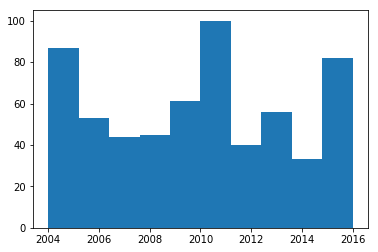

In [302]:
hist(df_m_az_all_other_cutting.Year, weights=df_m_az_all_other_cutting.counts)

(array([ 79.,  46.,  67.,  45.,  53., 121.,  58.,  55.,  66., 118.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

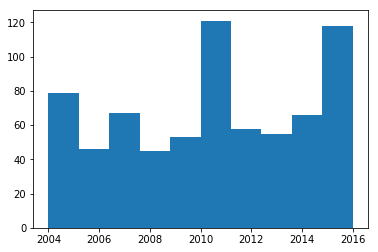

In [303]:
hist(df_m_az_all_other_other.Year, weights=df_m_az_all_other_other.counts)

(array([54., 20., 30., 25., 17., 16., 12.,  9.,  6., 16.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

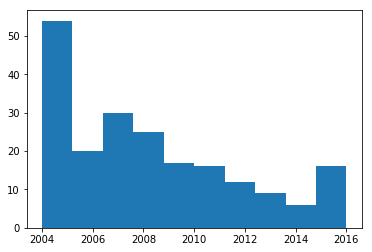

In [304]:
hist(df_m_az_all_other_unarmed.Year, weights=df_m_az_all_other_unarmed.counts)

In [238]:
df_fm = pd.read_csv('Firearm Murders.csv', sep=',', encoding='Latin-1') # Read the four raw .csv file, store into data frames

df_fm_az = df_fm[df_fm['State'] == 'Arizona']
df_fm_az.head()



,Year,State,Total,Total minus Unknown,Type,By Type
60,2004,Arizona,295,288,Handgun,244
61,2004,Arizona,295,288,Rifle,30
62,2004,Arizona,295,288,Shotgun,14
63,2004,Arizona,295,288,Unknown,7
256,2005,Arizona,334,311,Handgun,270


In [274]:
counts = df_fm_az.iloc[:,-1] #create another dataframe with simpler column title 
df_fm_az["counts"] = counts

df_fm_az.head()

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,State,Total,Total minus Unknown,Type,By Type,counts
60,2004,Arizona,295,288,Handgun,244,244
61,2004,Arizona,295,288,Rifle,30,30
62,2004,Arizona,295,288,Shotgun,14,14
63,2004,Arizona,295,288,Unknown,7,7
256,2005,Arizona,334,311,Handgun,270,270


In [289]:
df_fm_az_handgun = df_fm_az[df_fm_az["Type"] == "Handgun"]
df_fm_az_rifle = df_fm_az[df_fm_az["Type"] == "Rifle"]
df_fm_az_shotgun = df_fm_az[df_fm_az["Type"] == "Shotgun"]
df_fm_az_unknown = df_fm_az[df_fm_az["Type"] == "Unknown"]

(array([30., 27., 12., 16., 13., 90., 33., 29., 25., 81.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

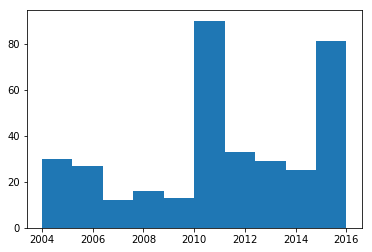

In [277]:
hist(df_fm_az_unknown.Year, weights=df_fm_az_unknown.counts)

(array([514., 269., 265., 243., 164., 317., 157., 133., 116., 284.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

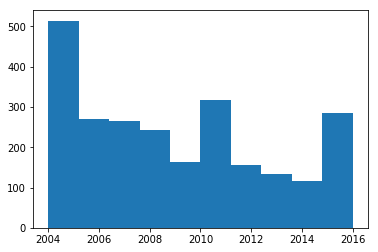

In [291]:
hist(df_fm_az_handgun.Year, weights=df_fm_az_handgun.counts)

(array([52., 33., 35., 15., 10., 28., 12., 11.,  6., 20.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

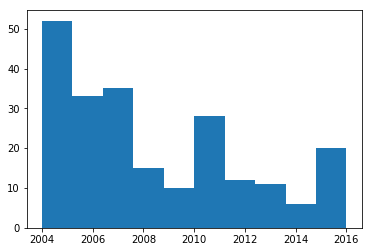

In [292]:
hist(df_fm_az_rifle.Year, weights=df_fm_az_rifle.counts)

(array([33., 14., 11., 16., 10., 19.,  9., 11.,  6., 13.]),
 array([2004. , 2005.2, 2006.4, 2007.6, 2008.8, 2010. , 2011.2, 2012.4,
        2013.6, 2014.8, 2016. ]),
 <a list of 10 Patch objects>)

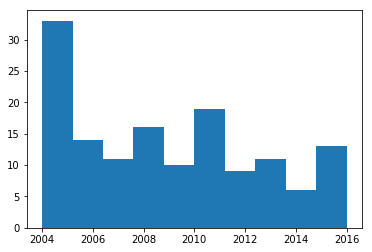

In [293]:
hist(df_fm_az_shotgun.Year, weights=df_fm_az_shotgun.counts)